# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ribka Agustina Johan
- **Email:** ribkaaj5@gmail.com
- **ID Dicoding:** ribka_agustina_johan

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca (weathersit) memengaruhi jumlah penyewaan sepeda?
- Bagaimana distribusi jumlah pengguna sepeda per jam (cnt) di berbagai jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
# ## Import Semua Packages/Library yang Digunakan
# Bagian ini akan mengimpor semua library yang digunakan dalam proyek analisis data

import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk perhitungan numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
import streamlit as st  # Untuk membuat antarmuka interaktif berbasis web

# Set style visualisasi
sns.set(style='whitegrid')

# Jika ada library tambahan, bisa ditambahkan di sini


## Data Wrangling

### Gathering Data

In [5]:

day_df = pd.read_csv('Data/day.csv')
hour_df = pd.read_csv('Data/hour.csv')


**Insight:**
**Insight untuk `Data/day.csv`:**
  - Dataset ini mencatat penggunaan sepeda harian dengan informasi cuaca, suhu, musim, dan total penyewa sepeda (`cnt`).
  - Penyewaan sepeda (`cnt`) bervariasi dipengaruhi oleh faktor eksternal seperti cuaca (`weathersit`) dan suhu (`temp`).

**Insight untuk `Data/hour.csv`:**
  - Dataset ini mencatat penggunaan sepeda per jam, memudahkan analisis pola harian berdasarkan waktu (`hr`).
  - Data ini membantu melihat kapan penyewaan sepeda mencapai puncak dan membandingkan antara hari kerja (`workingday`) dan akhir pekan.

### Assessing Data

In [10]:
# Load the datasets again
day_df = pd.read_csv('Data/day.csv')
hour_df = pd.read_csv('Data/hour.csv')

# Assessing the basic statistics of both datasets
day_df_assess = day_df.describe()
hour_df_assess = hour_df.describe()

# Show the assessment results
day_df_assess, hour_df_assess

# Assessing Dataset day.csv
print("Assessment for day.csv:")
print(day_df.describe())

# Assessing Dataset hour.csv
print("\nAssessment for hour.csv:")
print(hour_df.describe())


Assessment for day.csv:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std

**Insight:**
**Insight untuk `Data/day.csv`:**
- Rata-rata pengguna sepeda per hari (`cnt`) sekitar 4504, dengan rentang dari 22 hingga 8714, menunjukkan variasi penggunaan yang besar setiap harinya.
- Suhu (`temp`) berkisar antara 0.06 hingga 0.86 dalam skala relatif, dengan rata-rata 0.49, mencerminkan distribusi suhu yang cukup merata sepanjang tahun.
- Kondisi cuaca (`weathersit`) berkisar dari 1 (cerah) hingga 3 (buruk), menunjukkan pengaruh cuaca terhadap penyewaan sepeda.

**Insight untuk `Data/hour.csv`:**
- Rata-rata pengguna sepeda per jam (`cnt`) sekitar 189, dengan rentang dari 1 hingga 977, menunjukkan puncak penggunaan di jam-jam tertentu.
- Data lebih banyak berasal dari hari kerja (`workingday`) dengan rata-rata 0.68, menunjukkan kemungkinan perbedaan pola penggunaan antara hari kerja dan akhir pekan.
- Suhu (`temp`) dan suhu nyata (`atemp`) hampir serupa, dengan nilai maksimum mendekati 1.0, mencerminkan kondisi terpanas saat data dikumpulkan.

### Cleaning Data

In [11]:
# ## Data Wrangling: Cleaning Data
# Proses pembersihan data untuk dataset day.csv dan hour.csv

# Mengecek missing values pada kedua dataset
print("Missing values in day.csv:")
print(day_df.isnull().sum())

print("\nMissing values in hour.csv:")
print(hour_df.isnull().sum())

# Jika ada missing values, kita bisa menghapus atau menggantinya
# Pada contoh ini, kita akan menghapus baris yang memiliki missing values
day_df_clean = day_df.dropna()
hour_df_clean = hour_df.dropna()

# Menampilkan informasi data setelah pembersihan
print("\nInfo data day.csv setelah cleaning:")
print(day_df_clean.info())

print("\nInfo data hour.csv setelah cleaning:")
print(hour_df_clean.info())

# Mengecek apakah ada duplikasi dalam data
print("\nChecking for duplicates in day.csv:")
print(day_df_clean.duplicated().sum())

print("\nChecking for duplicates in hour.csv:")
print(hour_df_clean.duplicated().sum())

# Jika ada duplikasi, kita bisa menghapus duplikat
day_df_clean = day_df_clean.drop_duplicates()
hour_df_clean = hour_df_clean.drop_duplicates()

# Menampilkan hasil setelah menghapus duplikasi
print("\nData day.csv setelah menghapus duplikat:")
print(day_df_clean.info())

print("\nData hour.csv setelah menghapus duplikat:")
print(hour_df_clean.info())


Missing values in day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Info data day.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4

**Insight:**

**Insight untuk `Data/day.csv`:**
- Tidak ditemukan missing values pada dataset day.csv, sehingga tidak diperlukan pengisian atau penghapusan missing data.
- Tidak ada duplikasi dalam dataset, sehingga semua data dianggap valid dan dapat langsung digunakan untuk analisis lebih lanjut.

**Insight untuk `Data/hour.csv`:**
- Sama seperti dataset day.csv, tidak ada missing values pada dataset hour.csv, jadi tidak diperlukan langkah pengisian data kosong.
- Tidak ditemukan duplikasi, sehingga data sudah bersih dan siap dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

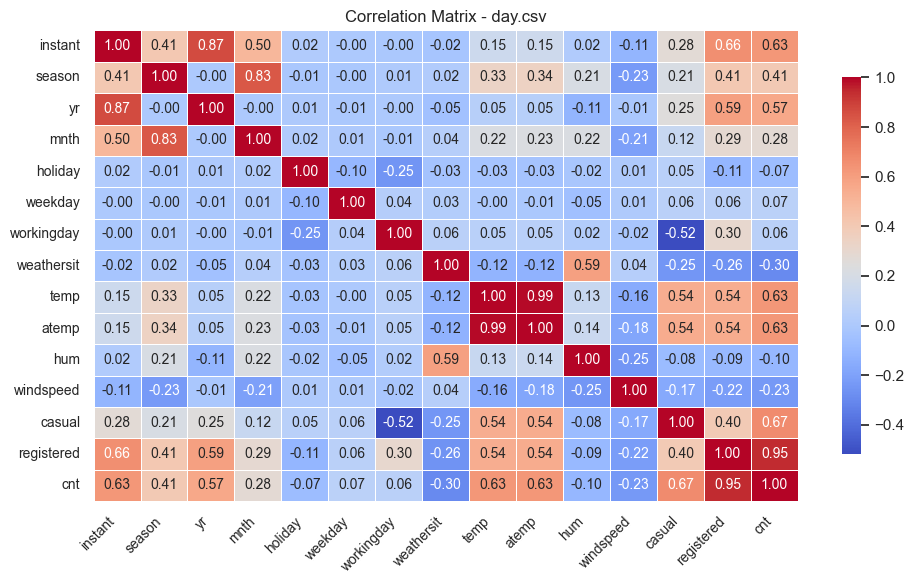

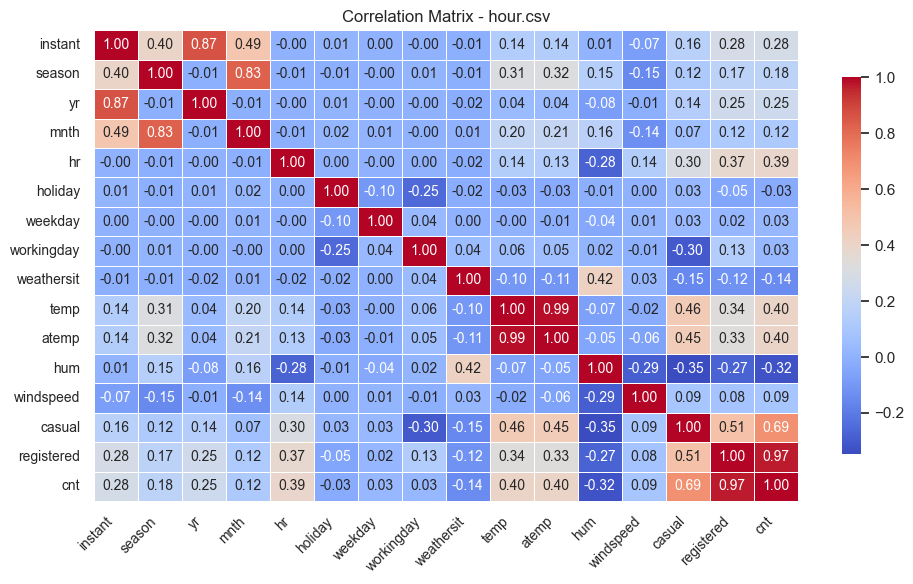

In [18]:
# 1. Selecting only numerical columns from day.csv
numerical_cols_day = day_df_clean.select_dtypes(include=['float64', 'int64'])

# Selecting only numerical columns from hour.csv
numerical_cols_hour = hour_df_clean.select_dtypes(include=['float64', 'int64'])

# 2. Correlation and Heatmap for day.csv
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols_day.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Matrix - day.csv', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Correlation and Heatmap for hour.csv
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols_hour.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Matrix - hour.csv', fontsize=12)
plt.tight_layout()
plt.show()


**Insight:**
**Insight untuk `Data/day.csv`:**
- Terdapat korelasi kuat antara jumlah pengguna sepeda (`cnt`) dengan pengguna terdaftar (`registered`) dan pengguna kasual (`casual`), menunjukkan bahwa total pengguna sangat dipengaruhi oleh kedua kelompok ini.
- Suhu (`temp`) juga berkorelasi positif dengan jumlah pengguna, yang berarti cuaca lebih hangat mendorong lebih banyak orang menggunakan sepeda.

**Insight untuk `Data/hour.csv`:**
- Korelasi kuat antara jumlah pengguna sepeda per jam (`cnt`) dengan pengguna terdaftar (`registered`) dan kasual (`casual`), mirip dengan dataset harian.
- Korelasi antara waktu (`hr`) dan jumlah pengguna tidak terlalu signifikan, menunjukkan adanya jam-jam puncak tertentu, namun tidak sepanjang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\RIBKA AGUSTINA JOHAN\AppData\Local\Temp\ipykernel_11244\2236183580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, palette=colors)  # Menggunakan warna hijau berbeda untuk yang tertinggi


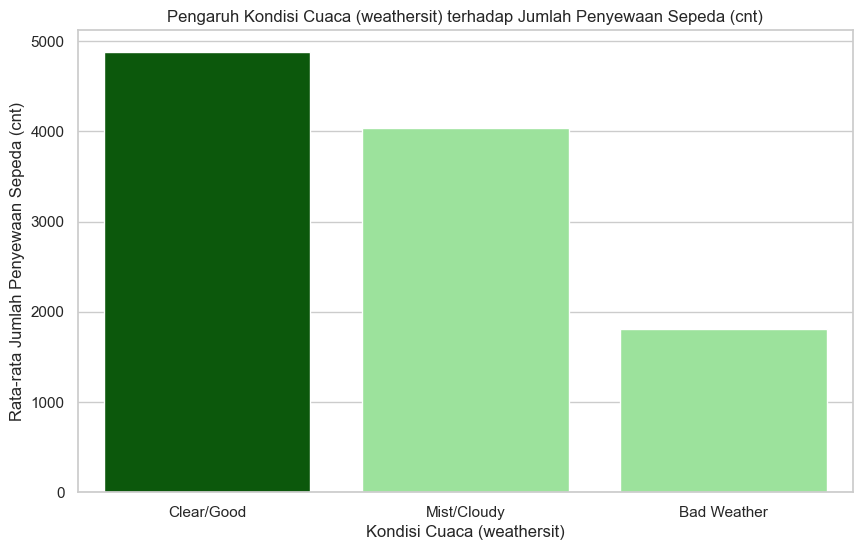

In [22]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca (weathersit)
weather_group = day_df_clean.groupby('weathersit')['cnt'].mean().reset_index()

# Menentukan warna, dua warna sama dan satu warna berbeda untuk yang tertinggi
colors = ['lightgreen' if cnt != weather_group['cnt'].max() else 'darkgreen' for cnt in weather_group['cnt']]

# Membuat plot untuk melihat hubungan antara kondisi cuaca dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, palette=colors)  # Menggunakan warna hijau berbeda untuk yang tertinggi
plt.title('Pengaruh Kondisi Cuaca (weathersit) terhadap Jumlah Penyewaan Sepeda (cnt)')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(ticks=[0, 1, 2], labels=['Clear/Good', 'Mist/Cloudy', 'Bad Weather'])  # Mengganti label kondisi cuaca
plt.show()


### Pertanyaan 2:

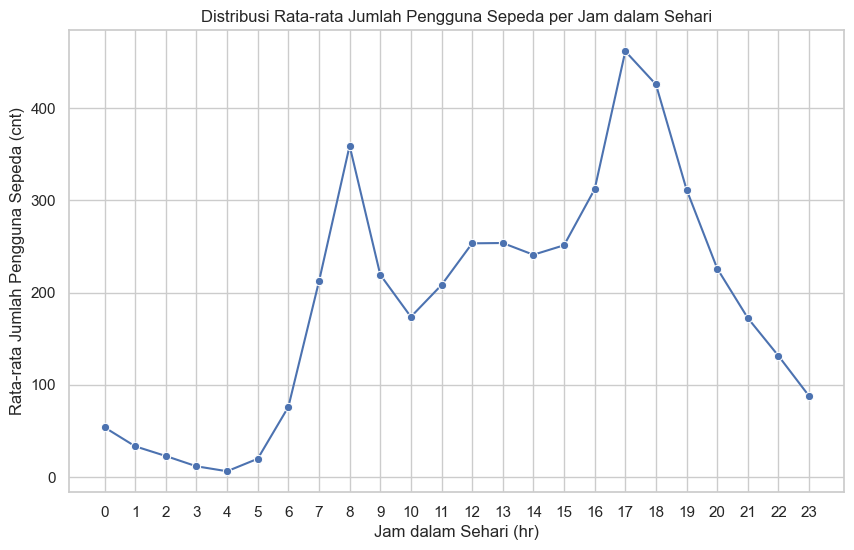

In [17]:
# ## Visualisasi Data - Distribusi Jumlah Pengguna Sepeda per Jam dalam Sehari

# Menghitung rata-rata jumlah penyewaan sepeda per jam
hour_group = hour_df_clean.groupby('hr')['cnt'].mean().reset_index()

# Membuat plot untuk melihat distribusi jumlah pengguna sepeda per jam dalam sehari
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_group, marker='o', color='b')
plt.title('Distribusi Rata-rata Jumlah Pengguna Sepeda per Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari (hr)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda (cnt)')
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0 hingga 23
plt.grid(True)
plt.show()


**Insight:**


### Pertanyaan 1: **Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda**
- Cuaca cerah  menghasilkan penyewaan sepeda tertinggi.
- Cuaca berkabut atau berawan menurunkan jumlah penyewaan sepeda.
- Cuaca buruk (seperti hujan) membuat orang lebih jarang menyewa sepeda.

### Pertanyaan 2: **Distribusi jumlah pengguna sepeda per jam**
- Penyewaan sepeda paling tinggi di pagi hari (jam 8) dan sore hari (jam 17), kemungkinan untuk perjalanan kerja atau sekolah.
- Penyewaan menurun di siang hari dan sangat rendah pada malam hari.

Ringkasannya, cuaca dan waktu sangat memengaruhi pola penggunaan sepeda.

## Conclusion

Conclution pertanyaan 1
- Cuaca yang lebih baik (cerah atau berawan) mendorong lebih banyak orang untuk menyewa sepeda.
- Saat cuaca buruk, seperti hujan atau kabut tebal, penyewaan sepeda menurun drastis.
- Jadi,cuaca memiliki pengaruh besar pada penggunaan sepeda, di mana semakin buruk cuacanya, semakin sedikit jumlah penyewaan.

Conclution pertanyaan 2
- Penggunaan sepeda paling tinggi di jam sibuk, yaitu pagi hari (jam 8) dan **sore hari (jam 17), yang kemungkinan besar terkait dengan perjalanan ke dan dari tempat kerja atau sekolah.
- Setelah jam sibuk, penggunaan sepeda menurun, dengan aktivitas yang sangat rendah di malam hingga dini hari.
- Waktu dalam sehari sangat memengaruhi pola penggunaan sepeda, dengan jam sibuk menunjukkan puncak penggunaan dan malam hari menunjukkan penurunan.